<a href="https://colab.research.google.com/github/vinigcruz/Analise-Seguranca-Curitiba/blob/feature%2Fvinicius/analise_de_seguran%C3%A7a__ambiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()


Saving Dados_2024-2025 v3.csv to Dados_2024-2025 v3.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Dados_2024-2025 v3.csv']))
df.head()

,ID,Ano,Mês,Dia,Dia da Semana,Hora,AISP,Município,Bairro,Tipo Natureza,Natureza,Ambiente,Populacao
0,2024407731,2024,abr,1,seg,10,1ª AISP - Curitiba,CURITIBA,ABRANCHES,NATUREZA CONSUMADA,DANO,RESIDENCIA,14515.0
1,2024411274,2024,abr,1,seg,17,1ª AISP - Curitiba,CURITIBA,ABRANCHES,NATUREZA CONSUMADA,FURTO SIMPLES,OUTROS,14515.0
2,2024414148,2024,abr,1,seg,20,1ª AISP - Curitiba,CURITIBA,ABRANCHES,NATUREZA CONSUMADA,ROUBO,PUBLICO,14515.0
3,2024414148,2024,abr,1,seg,20,1ª AISP - Curitiba,CURITIBA,ABRANCHES,NATUREZA CONSUMADA,ROUBO,VEICULO,14515.0
4,2024429608,2024,abr,3,qua,0,1ª AISP - Curitiba,CURITIBA,ABRANCHES,NATUREZA CONSUMADA,FURTO SIMPLES,OUTROS,14515.0


In [ ]:
#Verificação dos dados / Contagem dos dados faltantes
print ("---Informações do DataFrame---")
df.info()
#print("\n---Contagem de Dados Faltantes---")
#print(df.isnull().sum())


---Informações do DataFrame---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76863 entries, 0 to 76862
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             76863 non-null  int64  
 1   Ano            76863 non-null  int64  
 2   Mês            76863 non-null  object 
 3   Dia            76863 non-null  int64  
 4   Dia da Semana  76863 non-null  object 
 5   Hora           76863 non-null  int64  
 6   AISP           76863 non-null  object 
 7   Município      76863 non-null  object 
 8   Bairro         76862 non-null  object 
 9   Tipo Natureza  76863 non-null  object 
 10  Natureza       76863 non-null  object 
 11  Ambiente       76863 non-null  object 
 12  Populacao      76852 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 7.6+ MB



---Calculando Rankigns de ambiente---

---RANKING: Ambiente com MAIS Ocorrências (TOP 10)---
Ambiente
OUTROS                    30778
PUBLICO                   20102
RESIDENCIA                11958
COMERCIO                   5005
TRANSPORTE                 2492
ASSOCIACAO                 1188
VEICULO                    1100
ALIMENTACAO / DIVERSAO     1054
PRESTACAO DE SERVICOS       702
SAUDE                       621
Name: count, dtype: int64

---RANKING: Ambiente com MENOS Ocorrências (TOP 10)---
Ambiente
RELIGIOSOS                 190
MERCADO                    159
ORGAO PUBLICO              121
DERIVADO PETROLEO          106
UNIDADES DE CONSERVACAO     77
RURAL                       71
DEPEM                       27
INDUSTRIA                   18
UNIDADE DE ACOLHIMENTO      13
-                            1
Name: count, dtype: int64

--- Gerando gráfico dos Top 10 Ambientes ---


/tmp/ipython-input-593366412.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_ambientes.values, y=top_10_ambientes.index, orient='h', palette='viridis')


Gráfico 'ranking_top_10_ambientes.png' salvo com sucesso!


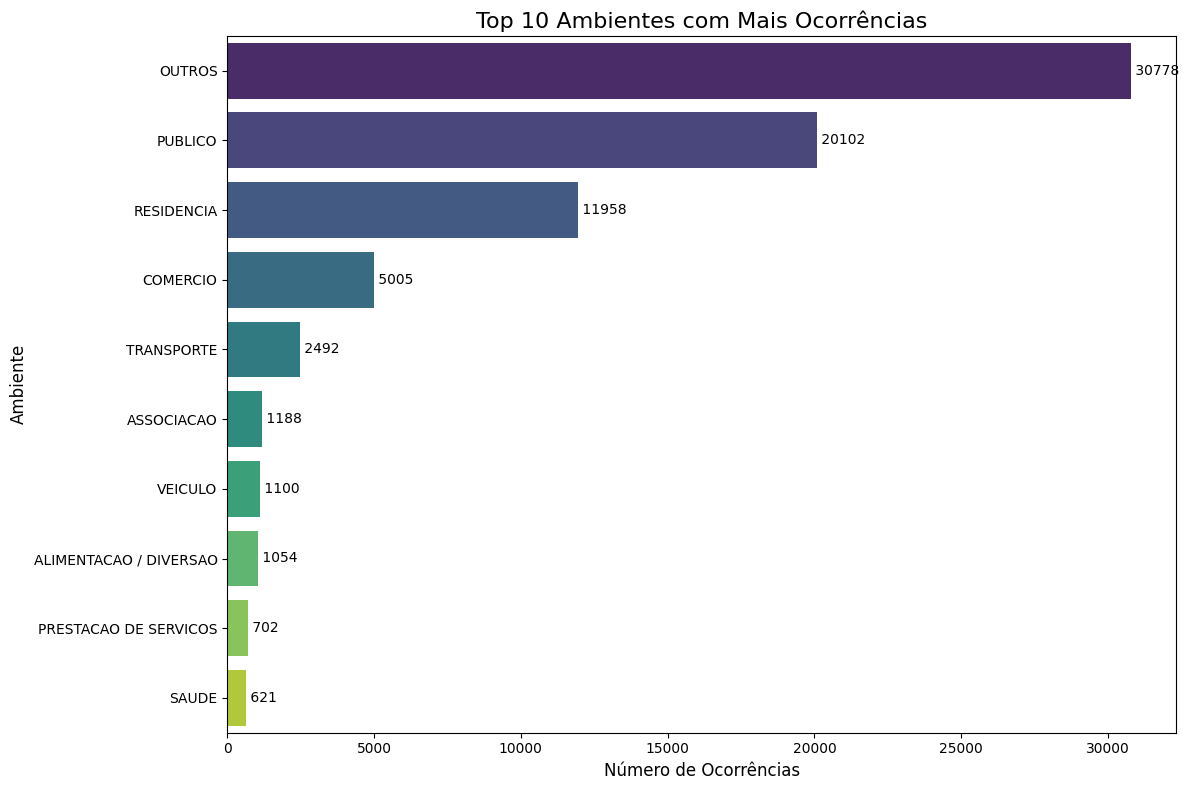

In [ ]:
#Ranking dos ambientes
import matplotlib.pyplot as plt
import seaborn as sns

print("\n---Calculando Rankigns de ambiente---")
ranking_ambientes = df['Ambiente'].value_counts()

print("\n---RANKING: Ambiente com MAIS Ocorrências (TOP 10)---")
print(ranking_ambientes.head(10))

print("\n---RANKING: Ambiente com MENOS Ocorrências (TOP 10)---")
print(ranking_ambientes.tail(10))

print("\n--- Gerando gráfico dos Top 10 Ambientes ---")

top_10_ambientes = ranking_ambientes.head(10)

plt.figure(figsize=(12, 8))

sns.barplot(x=top_10_ambientes.values, y=top_10_ambientes.index, orient='h', palette='viridis')

plt.title('Top 10 Ambientes com Mais Ocorrências', fontsize=16)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Ambiente', fontsize=12)

for index, value in enumerate(top_10_ambientes.values):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()

plt.savefig('ranking_top_10_ambientes.png')

print("Gráfico 'ranking_top_10_ambientes.png' salvo com sucesso!")



---Ambientes com mais Furtos---
Ambiente
OUTROS                   29233
PUBLICO                   3169
COMERCIO                  1331
TRANSPORTE                1034
RESIDENCIA                 942
EVENTOS                    133
VEICULO                    126
SAUDE                      124
PRESTACAO DE SERVICOS      121
ASSOCIACAO                 119
Name: count, dtype: int64

--- Gerando gráfico dos Top 10 Ambientes para Furto Simples ---


/tmp/ipython-input-1095201261.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gráfico 'ranking_top_10_ambientes_furtos.png' salvo com sucesso!


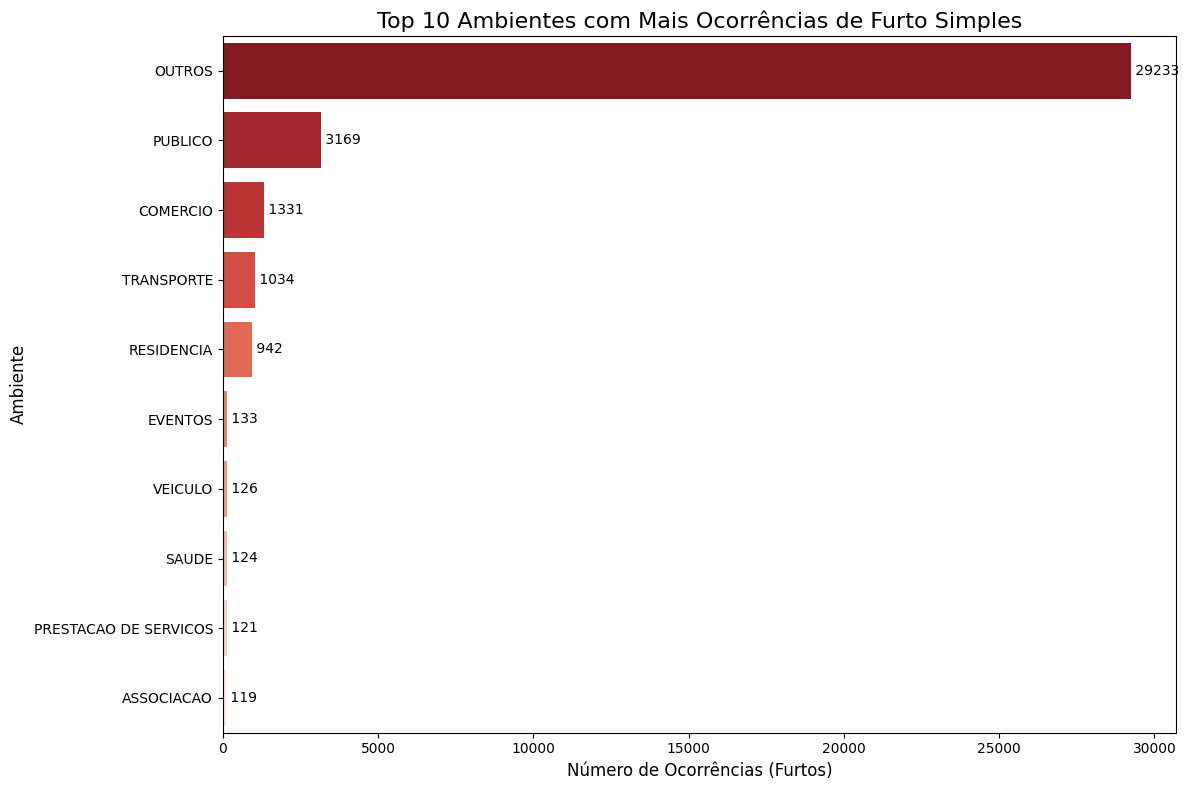

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Classificar o que são outros.

df_furtos = df[df['Natureza'] == 'FURTO SIMPLES']
print("\n---Ambientes com mais Furtos---")
print(df_furtos['Ambiente'].value_counts().head(10))
#Furto simples = Subtrair algo de alguém sem violência ou grave ameaça.
#Juntar nesse insight todos os tipos de furto

print("\n--- Gerando gráfico dos Top 10 Ambientes para Furto Simples ---")

try:
    top_10_ambientes_furtos = df_furtos['Ambiente'].value_counts().head(10)

    plt.figure(figsize=(12, 8))

    sns.barplot(
        x=top_10_ambientes_furtos.values,
        y=top_10_ambientes_furtos.index,
        orient='h',
        palette='Reds_r'
    )
    plt.title('Top 10 Ambientes com Mais Ocorrências de Furto Simples', fontsize=16)
    plt.xlabel('Número de Ocorrências (Furtos)', fontsize=12)
    plt.ylabel('Ambiente', fontsize=12)

    for index, value in enumerate(top_10_ambientes_furtos.values):
        plt.text(value, index, f' {value}', va='center')

    plt.tight_layout()

    plt.savefig('ranking_top_10_ambientes_furtos.png')

    print("Gráfico 'ranking_top_10_ambientes_furtos.png' salvo com sucesso!")

except NameError:
    print("\n[ERRO] O DataFrame 'df_furtos' não foi encontrado.")
    print("Por favor, certifique-se de executar o bloco de código anterior (que filtra o 'df') antes de rodar este script de plotagem.")
except Exception as e:
    print(f"\n[ERRO] Ocorreu um erro inesperado ao gerar o gráfico: {e}")

In [4]:
df_roubos = df[df['Natureza'] == 'ROUBO']
print("\n---Ambientes com mais Roubos---")
print(df_roubos['Ambiente'].value_counts().head(10))
#Subtrair algo de algúem com violência ou ameaça.
#Juntar nesse insight todos os tipos de roubo
#Plotar grafico para postar no slide

Coluna 'Hora' verificada (numérica).

Total de ocorrências: 76863
Total de ocorrências noturnas (18h-06h): 40121

--- Top 10 Ambientes com mais ocorrências noturnas (18h às 06h) ---
                 Ambiente  Contagem
0                  OUTROS     15758
1                 PUBLICO      9694
2              RESIDENCIA      7542
3                COMERCIO      2721
4  ALIMENTACAO / DIVERSAO       941
5              TRANSPORTE       774
6              ASSOCIACAO       762
7                 VEICULO       427
8   PRESTACAO DE SERVICOS       324
9                   SAUDE       278
Gráfico 'top_10_ambientes_noturnos.json' salvo.

--- Top 10 Bairros com mais ocorrências noturnas (18h às 06h) ---
                          Bairro  Contagem
0                         CENTRO      4518
1  CIDADE INDUSTRIAL DE CURITIBA      2838
2                  SITIO CERCADO      2253
3                     AGUA VERDE      1552
4                      TATUQUARA      1532
5                      BOQUEIRAO      1482
6     

In [9]:
import pandas as pd
import altair as alt
import os

# --- Leitura do CSV ---
try:
    df = pd.read_csv("Dados_2024-2025 v3.csv")
except Exception as e:
    print(f"Erro ao ler o CSV: {e}")
    try:
        df = pd.read_csv("Dados_2024-2025 v3.csv", encoding='latin1')
        print("CSV lido com sucesso usando encoding 'latin1'.")
    except Exception as e2:
        print(f"Erro ao ler o CSV com 'latin1': {e2}")
        exit()

# --- Verificação e Preparação da Coluna 'Hora' ---
if 'Hora' not in df.columns:
    print("Erro: A coluna 'Hora' não foi encontrada no DataFrame.")
    print(f"Colunas disponíveis: {df.columns.tolist()}")
    exit()

if not pd.api.types.is_numeric_dtype(df['Hora']):
    print("Erro: A coluna 'Hora' não é numérica. Tentando converter...")
    try:
        df['Hora'] = pd.to_numeric(df['Hora'], errors='coerce')
        df = df.dropna(subset=['Hora'])
        df['Hora'] = df['Hora'].astype(int)
        print("Coluna 'Hora' convertida para numérica.")
    except Exception as e_conv:
        print(f"Falha ao converter a coluna 'Hora': {e_conv}")
        exit()
else:
    df['Hora'] = df['Hora'].astype(int)
    print("Coluna 'Hora' verificada (numérica).")

# --- Filtro de Ocorrências Noturnas (18h às 06h) ---
df_noite = df[(df['Hora'] >= 18) | (df['Hora'] < 6)].copy()

print(f"\nTotal de ocorrências: {len(df)}")
print(f"Total de ocorrências noturnas (18h-06h): {len(df_noite)}")

# --- Análise 1: Top 10 Ambientes ---
print("\n--- Top 10 Ambientes com mais ocorrências noturnas (18h às 06h) ---")
try:
    top_10_ambientes_data = df_noite['Ambiente'].value_counts().head(10).reset_index()
    top_10_ambientes_data.columns = ['Ambiente', 'Contagem']
    print(top_10_ambientes_data)

    chart_ambientes = alt.Chart(top_10_ambientes_data).mark_bar().encode(
        x=alt.X('Contagem:Q', title='Número de Ocorrências'),
        y=alt.Y('Ambiente:N', sort='-x', title='Ambiente'),
        tooltip=['Ambiente', 'Contagem']
    ).properties(
        title='Top 10 Ambientes por Ocorrências Noturnas (18h-06h)'
    ).interactive()

    chart_ambientes.save('top_10_ambientes_noturnos.json')
    print("Gráfico 'top_10_ambientes_noturnos.json' salvo.")

except KeyError:
    print("Erro: A coluna 'Ambiente' não foi encontrada.")
except Exception as e:
    print(f"Erro ao analisar 'Ambiente': {e}")

# --- Análise 2: Top 10 Bairros ---
print("\n--- Top 10 Bairros com mais ocorrências noturnas (18h às 06h) ---")
try:
    top_10_bairros_data = df_noite['Bairro'].value_counts().head(10).reset_index()
    top_10_bairros_data.columns = ['Bairro', 'Contagem']
    print(top_10_bairros_data)

    chart_bairros = alt.Chart(top_10_bairros_data).mark_bar().encode(
        x=alt.X('Contagem:Q', title='Número de Ocorrências'),
        y=alt.Y('Bairro:N', sort='-x', title='Bairro'),
        tooltip=['Bairro', 'Contagem']
    ).properties(
        title='Top 10 Bairros por Ocorrências Noturnas (18h-06h)'
    ).interactive()

    chart_bairros.save('top_10_bairros_noturnos.json')
    print("Gráfico 'top_10_bairros_noturnos.json' salvo.")

except KeyError:
    print("Erro: A coluna 'Bairro' não foi encontrada.")
except Exception as e:
    print(f"Erro ao analisar 'Bairro': {e}")

# --- Exibição e Salvamento dos Gráficos ---
try:
    # Combina os dois gráficos lado a lado
    combined_chart = (chart_ambientes | chart_bairros).properties(
        title="Ocorrências Noturnas: Top 10 Ambientes e Bairros (18h–06h)"
    )

    # Exibe em modo interativo (abre no navegador padrão)
    combined_chart.show()

    # Também salva em HTML interativo
    output_html = "graficos_noturnos.html"
    combined_chart.save(output_html)
    print(f"Gráficos interativos salvos em: {os.path.abspath(output_html)}")

except Exception as e:
    print(f"Erro ao exibir ou salvar os gráficos: {e}")


Coluna 'Hora' verificada (numérica).

Total de ocorrências: 76863
Total de ocorrências noturnas (18h-06h): 40121

--- Top 10 Ambientes com mais ocorrências noturnas (18h às 06h) ---
                 Ambiente  Contagem
0                  OUTROS     15758
1                 PUBLICO      9694
2              RESIDENCIA      7542
3                COMERCIO      2721
4  ALIMENTACAO / DIVERSAO       941
5              TRANSPORTE       774
6              ASSOCIACAO       762
7                 VEICULO       427
8   PRESTACAO DE SERVICOS       324
9                   SAUDE       278
Gráfico 'top_10_ambientes_noturnos.json' salvo.

--- Top 10 Bairros com mais ocorrências noturnas (18h às 06h) ---
                          Bairro  Contagem
0                         CENTRO      4518
1  CIDADE INDUSTRIAL DE CURITIBA      2838
2                  SITIO CERCADO      2253
3                     AGUA VERDE      1552
4                      TATUQUARA      1532
5                      BOQUEIRAO      1482
6     

alt.HConcatChart(...)

Gráficos interativos salvos em: /content/graficos_noturnos.html


In [ ]:
print("\n\n---DETALHADA: Ambiente 'RESIDENCIA'---")
# Filtra apenas o ambiente 'RESIDENCIA'
df_residencia = df[df['Ambiente'] == 'RESIDENCIA']

print("\n--- Principais CRIMES em RESIDENCIA ---")
print(df_residencia['Natureza'].value_counts().head(5))

print("\n--- Principais HORÁRIOS de crimes em RESIDENCIA ---")
# Isso nos mostra em quais horas do dia há mais registros nesse ambiente
print(df_residencia['Hora'].value_counts().head(5))



---DETALHADA: Ambiente 'RESIDENCIA'---

--- Principais CRIMES em RESIDENCIA ---
Natureza
PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO    5689
FURTO QUALIFICADO                            2055
DANO                                         1477
VIOLACAO DE DOMICILIO                        1152
FURTO SIMPLES                                 942
Name: count, dtype: int64

--- Principais HORÁRIOS de crimes em RESIDENCIA ---
Hora
0     1113
22    1099
23     953
1      792
21     638
Name: count, dtype: int64


In [ ]:
print("\n\n---ANÁLISE DETALHADA: Ambiente 'PUBLICO'---")
# Filtra apenas o ambiente 'PUBLICO'
df_publico = df[df['Ambiente'] == 'PUBLICO']

print("\n--- Principais CRIMES em PUBLICO ---")
print(df_publico['Natureza'].value_counts().head(5))

print("\n--- Principais HORÁRIOS de crimes em PUBLICO ---")
print(df_publico['Hora'].value_counts().head(5))



---ANÁLISE DETALHADA: Ambiente 'PUBLICO'---

--- Principais CRIMES em PUBLICO ---
Natureza
DROGAS PARA O CONSUMO PESSOAL                4461
FURTO QUALIFICADO                            3761
ROUBO                                        3569
FURTO SIMPLES                                3169
PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO    1904
Name: count, dtype: int64

--- Principais HORÁRIOS de crimes em PUBLICO ---
Hora
20    1197
22    1182
19    1094
23    1085
15    1045
Name: count, dtype: int64


In [13]:
# --- Filtro de Áreas Nobres x Periféricas ---
# Semelhante ao furto simples, porém com agravante técnico.
print("\n\n--- ANÁLISE DETALHADA: Áreas Nobres x Periféricas ---")

bairros_nobres = ['AGUA VERDE', 'BATEL', 'BIGORRILHO', 'ECOVILLE', 'JARDIM DAS AMERICAS']
bairros_perifericos = ['CIDADE INDUSTRIAL DE CURITIBA', 'TATUQUARA', 'SITIO CERCADO', 'CAJURU', 'PILARZINHO']

# Filtrar DataFrames
df_nobres = df[df['Bairro'].isin(bairros_nobres)]
df_perifericos = df[df['Bairro'].isin(bairros_perifericos)]

# Impressões de análise
print(f"\n--- Análise de {len(bairros_nobres)} Bairros Nobres ---")
print(f"Total de ocorrências: {len(df_nobres)}")
print("\n--- Principais Crimes (Bairros Nobres) ---")
print(df_nobres['Natureza'].value_counts().head(5))
print("\n--- Principais Ambientes (Bairros Nobres) ---")
print(df_nobres['Ambiente'].value_counts().head(5))

print(f"\n\n--- Análise de {len(bairros_perifericos)} Bairros Periféricos ---")
print(f"Total de ocorrências: {len(df_perifericos)}")
print("\n--- Principais Crimes (Bairros Periféricos) ---")
print(df_perifericos['Natureza'].value_counts().head(5))
print("\n--- Principais Ambientes (Bairros Periféricos) ---")
print(df_perifericos['Ambiente'].value_counts().head(5))

# --- Gráfico: Tipos de Ocorrências em Áreas Nobres vs Periféricas ---
try:
    # Contar as 10 naturezas mais comuns em cada grupo
    top_nobres = df_nobres['Natureza'].value_counts().head(10).reset_index()
    top_nobres.columns = ['Natureza', 'Ocorrências']
    top_nobres['Área'] = 'Nobre'

    top_perifericos = df_perifericos['Natureza'].value_counts().head(10).reset_index()
    top_perifericos.columns = ['Natureza', 'Ocorrências']
    top_perifericos['Área'] = 'Periférica'

    # Combinar os dois DataFrames
    df_tipos = pd.concat([top_nobres, top_perifericos], ignore_index=True)

    # Gráfico de barras agrupadas
    chart_tipos = alt.Chart(df_tipos).mark_bar().encode(
        y=alt.Y('Natureza:N', sort='-x', title='Tipo de Ocorrência'),
        x=alt.X('Ocorrências:Q', title='Total de Ocorrências'),
        color=alt.Color('Área:N', title='Área'),
        column=alt.Column('Área:N', title=None),
        tooltip=['Natureza', 'Ocorrências', 'Área']
    ).properties(
        title='Top 10 Tipos de Ocorrências: Áreas Nobres x Periféricas',
        width=250,
        height=300
    )

    # Exibir e salvar
    chart_tipos.show()
    chart_tipos.save('tipos_ocorrencias_nobres_vs_perifericas.html')

    print(f"\nGráfico salvo em: {os.path.abspath('tipos_ocorrencias_nobres_vs_perifericas.html')}")

except KeyError:
    print("Erro: coluna 'Natureza' não encontrada no DataFrame.")
except Exception as e:
    print(f"Erro ao gerar gráfico de tipos de ocorrências: {e}")




--- ANÁLISE DETALHADA: Áreas Nobres x Periféricas ---

--- Análise de 5 Bairros Nobres ---
Total de ocorrências: 6849

--- Principais Crimes (Bairros Nobres) ---
Natureza
FURTO SIMPLES                                4264
FURTO QUALIFICADO                            1261
ROUBO                                         393
PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO     300
DANO                                          253
Name: count, dtype: int64

--- Principais Ambientes (Bairros Nobres) ---
Ambiente
OUTROS        3779
PUBLICO       1413
COMERCIO       472
RESIDENCIA     389
ASSOCIACAO     153
Name: count, dtype: int64


--- Análise de 5 Bairros Periféricos ---
Total de ocorrências: 14289

--- Principais Crimes (Bairros Periféricos) ---
Natureza
FURTO SIMPLES                                4219
PERTURBACAO DO TRABALHO OU SOSSEGO ALHEIO    3855
DROGAS PARA O CONSUMO PESSOAL                2184
FURTO QUALIFICADO                            1401
DANO                                         

alt.Chart(...)


Gráfico salvo em: /content/tipos_ocorrencias_nobres_vs_perifericas.html


--- Criando gráfico de barras alternativo ---
Dados agregados. Top 5 bairros:
Bairro
CENTRO                           10732
CIDADE INDUSTRIAL DE CURITIBA     5117
SITIO CERCADO                     3699
AGUA VERDE                        3153
BOQUEIRAO                         2691
Name: count, dtype: int64


/tmp/ipython-input-3110263082.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Gráfico salvo como: top_20_bairros_ocorrencias.png


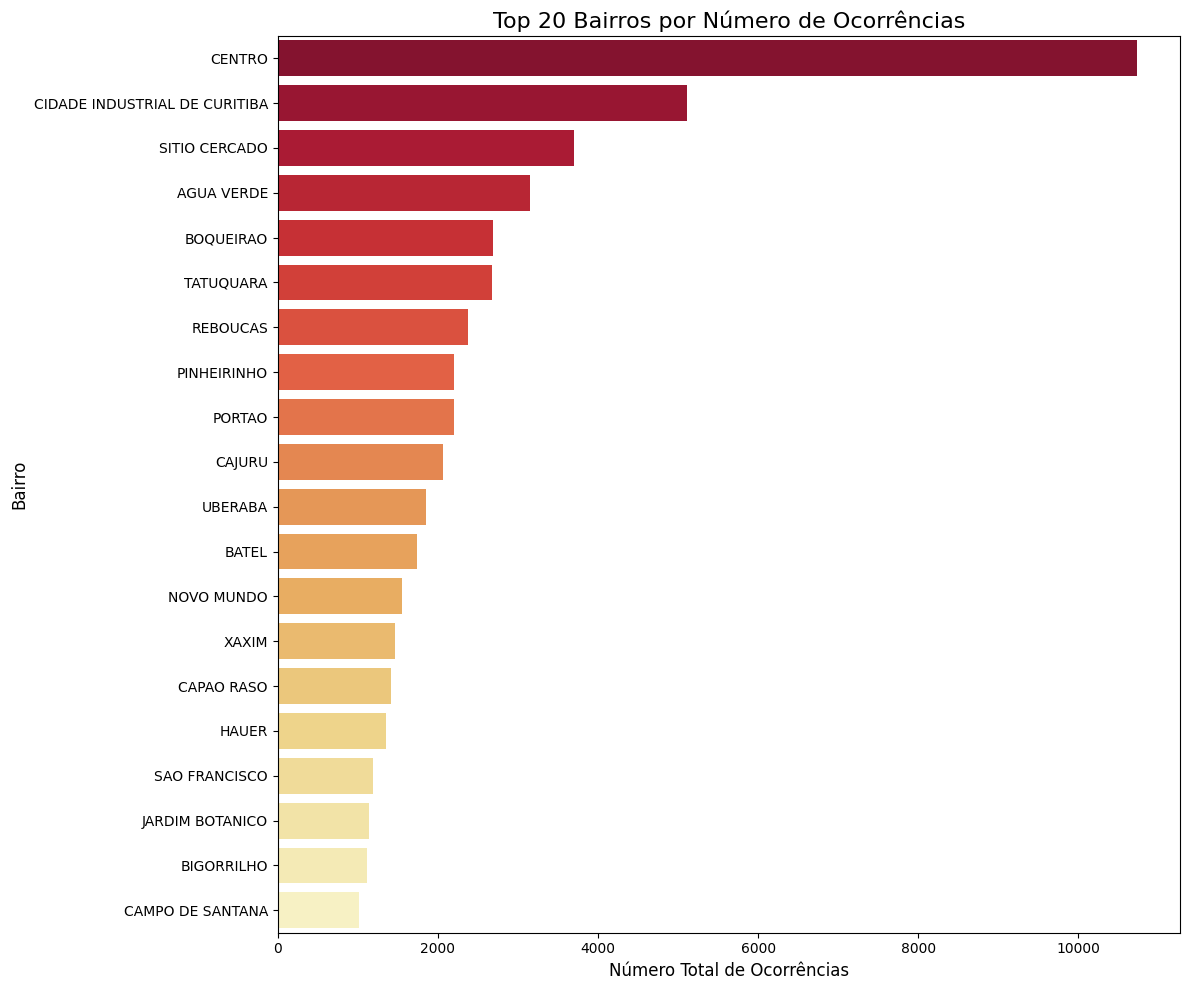

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Criando gráfico de barras alternativo ---")

try:
    # 1. Carregar os dados
    df = pd.read_csv("Dados_2024-2025 v3.csv")

    # 2. Contar ocorrências por bairro
    ocorrencias_bairro = df['Bairro'].value_counts()

    # 3. Pegar os Top 20
    top_20_bairros = ocorrencias_bairro.head(20)

    print("Dados agregados. Top 5 bairros:")
    print(top_20_bairros.head())

    # 4. Plotar o gráfico
    plt.figure(figsize=(12, 10))
    sns.barplot(
        x=top_20_bairros.values,
        y=top_20_bairros.index,
        palette='YlOrRd_r' # Usando a paleta de "calor" (Vermelho = alto)
    )

    plt.title('Top 20 Bairros por Número de Ocorrências', fontsize=16)
    plt.xlabel('Número Total de Ocorrências', fontsize=12)
    plt.ylabel('Bairro', fontsize=12)
    plt.tight_layout()

    # Salvar a imagem
    output_filename = "top_20_bairros_ocorrencias.png"
    plt.savefig(output_filename)

    print(f"\nGráfico salvo como: {output_filename}")

except Exception as e:
    print(f"Erro ao processar os dados: {e}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("Dados_2024-2025 v3.csv")

print("\n--- Aplicando Engenharia de Features Cíclicas (Hora) ---")
df['Hora_sin'] = np.sin(2 * np.pi * df['Hora'] / 23.0)
df['Hora_cos'] = np.cos(2 * np.pi * df['Hora'] / 23.0)

ocorrencias_relevantes = [
    'FURTO SIMPLES',
    'FURTO QUALIFICADO',
    'ROUBO',
    'DROGAS PARA O CONSUMO PESSOAL',
    'DANO'
]
df['Target'] = df['Natureza'].apply(lambda x: x if x in ocorrencias_relevantes else "OUTRAS_OCORRENCIAS")

features = ['Bairro', 'Ambiente', 'Dia da Semana', 'Mês', 'Hora_sin', 'Hora_cos']
target = 'Target'

df_limpo = df.dropna(subset=features + [target])

X = df_limpo[features]
y = df_limpo[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

numeric_features = ['Hora_sin', 'Hora_cos']
categorical_features = ['Bairro', 'Ambiente', 'Dia da Semana', 'Mês']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ],
    remainder='passthrough'
)

categorical_feature_indices = [2, 3, 4, 5]

classifier_hgb = HistGradientBoostingClassifier(
    random_state=42,
    class_weight='balanced',
    categorical_features=categorical_feature_indices,
    max_iter=200
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', classifier_hgb)])

print("\n--- Treinando o modelo... ---")
pipeline.fit(X_train, y_train)
print("Modelo treinado")

print("\n--- AVALIAÇÃO DO MODELO (nos dados de teste) ---")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia Geral: {accuracy * 100:.2f}%")
print("--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

print("\n" + "="*30)
print("     INICIANDO MODO DE PREVISÃO     ")
print("="*30)
print("Responda às perguntas para prever o tipo de ocorrência.")
print("(Digite 'sair' a qualquer momento para terminar)")

while True:
    try:
        bairro = input("\nDigite o Bairro (ex: CENTRO): ")
        if bairro.lower() == 'sair': break

        ambiente = input("Digite o Ambiente (ex: PUBLICO, RESIDENCIA): ")
        if ambiente.lower() == 'sair': break

        dia_semana = input("Digite o Dia da Semana (ex: seg, ter, qua): ")
        if dia_semana.lower() == 'sair': break

        mes = input("Digite o Mês (ex: abr, set, out): ")
        if mes.lower() == 'sair': break

        hora_str = input("Digite a Hora (0 a 23): ")
        if hora_str.lower() == 'sair': break

        hora = int(hora_str)
        if not (0 <= hora <= 23):
            print("Hora inválida. Por favor, insira um número entre 0 e 23.")
            continue

        hora_sin = np.sin(2 * np.pi * hora / 23.0)
        hora_cos = np.cos(2 * np.pi * hora / 23.0)

        dados_usuario = {
            'Bairro': [bairro],
            'Ambiente': [ambiente],
            'Dia da Semana': [dia_semana],
            'Mês': [mes],
            'Hora_sin': [hora_sin],
            'Hora_cos': [hora_cos]
        }

        df_input = pd.DataFrame(dados_usuario, columns=features)

        previsao = pipeline.predict(df_input)

        resultado = previsao[0]

        print("\n--- PREVISÃO DO MODELO ---")
        print(f"   O tipo de ocorrência mais provável é: {resultado}")
        print("------------------------------")

    except ValueError:
        print("Erro: A hora deve ser um número. Tente novamente.")
    except Exception as e:
        print(f"Ocorreu um erro: {e}. Reiniciando as perguntas.")

print("\n--- Modo de previsão encerrado ---")


--- Aplicando Engenharia de Features Cíclicas (Hora) ---

Dados divididos: 53803 para treino, 23059 para teste.

--- Treinando o modelo... ---
Modelo treinado

--- AVALIAÇÃO DO MODELO (nos dados de teste) ---

Acurácia Geral: 62.32%
--- Relatório de Classificação ---
                               precision    recall  f1-score   support

                         DANO       0.16      0.31      0.21      1141
DROGAS PARA O CONSUMO PESSOAL       0.39      0.71      0.51      1524
            FURTO QUALIFICADO       0.41      0.38      0.40      3195
                FURTO SIMPLES       0.95      0.79      0.86     11047
           OUTRAS_OCORRENCIAS       0.74      0.49      0.59      4542
                        ROUBO       0.27      0.46      0.34      1610

                     accuracy                           0.62     23059
                    macro avg       0.49      0.52      0.48     23059
                 weighted avg       0.71      0.62      0.65     23059


     INICIANDO MO

KeyboardInterrupt: Interrupted by user